In [1]:
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

HOUSE PRICE PRIDICTION

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

DIFFERENT COLUMNS AVAILABLE IN TABLE

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

univariate

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

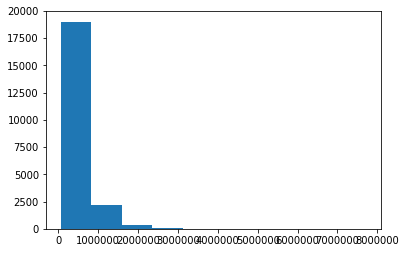

In [6]:
plt.hist(df["price"])

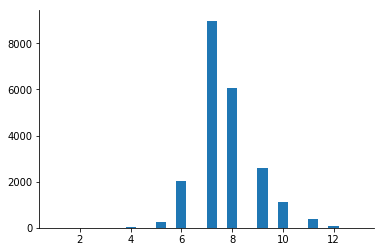

In [7]:
plt.hist(x="grade",data=df,bins=30)
sns.despine()

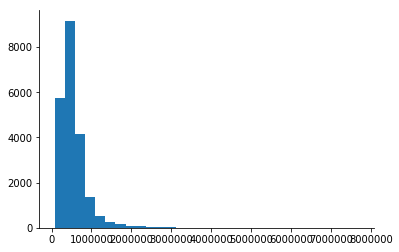

In [8]:
plt.hist(x="price",data=df,bins=30)
sns.despine()

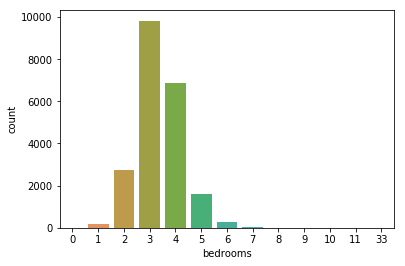

In [9]:
sns.countplot(x="bedrooms",data=df)

C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


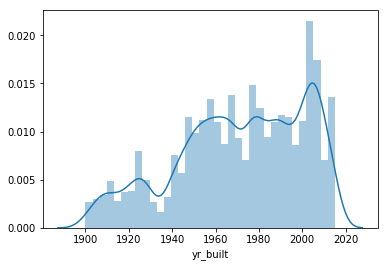

In [10]:
sns.distplot(df["yr_built"],kde=True)

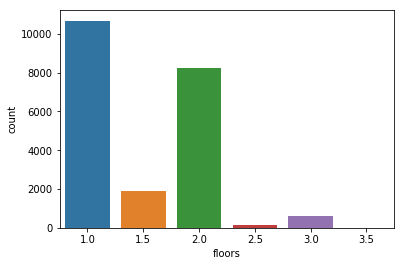

In [11]:
sns.countplot(x="floors",data=df)

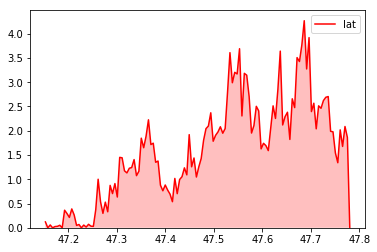

In [12]:
sns.kdeplot(df["lat"],shade=True, color="r",bw=.001)

##BIVARIATE ANALYSIS


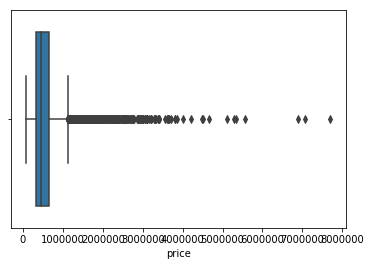

In [13]:
sns.boxplot(x="price",data=df)

C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


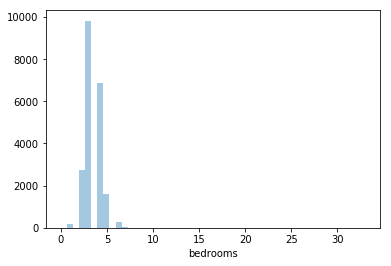

In [14]:
sns.distplot(df["bedrooms"],kde=False)

Bivariate

In [15]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


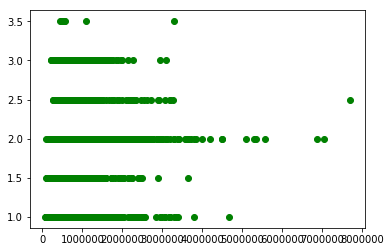

In [16]:
plt.scatter(df["price"],df["floors"],c="g")

C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


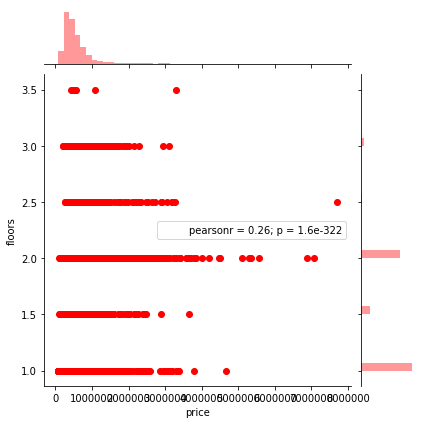

In [17]:
sns.jointplot(df["price"],df["floors"],color="r")

C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NIK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


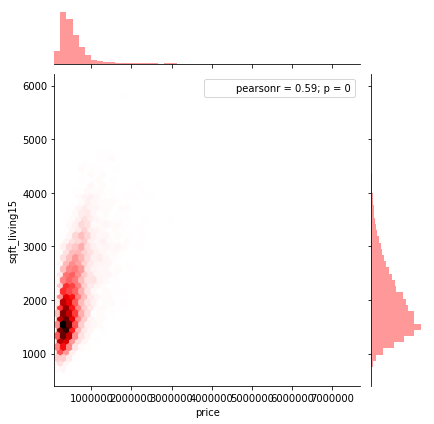

In [18]:
sns.jointplot(df["price"],df["sqft_living15"],kind="hex", color="r")

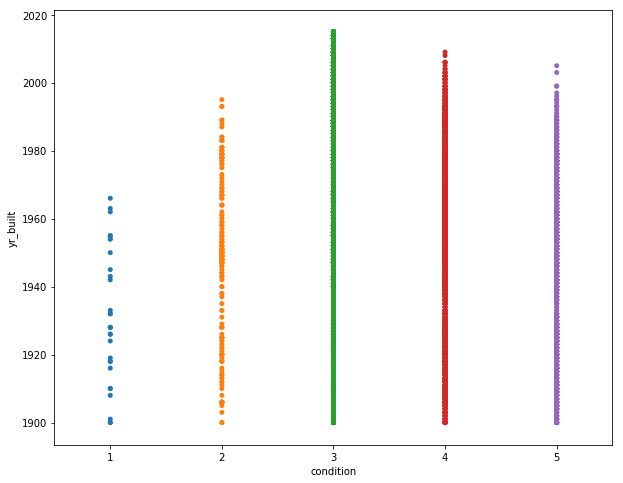

In [19]:
plt.figure(figsize=(10,8)) 
sns.stripplot(x="condition",y="yr_built",data=df)

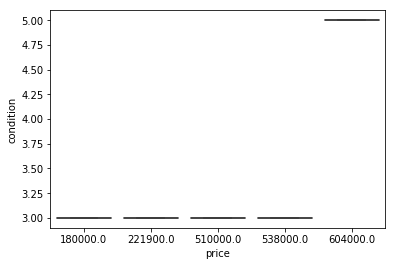

In [20]:
var=df.head(5)
sns.boxplot(x="price",y="condition",data=var)

MULTIVARIATE

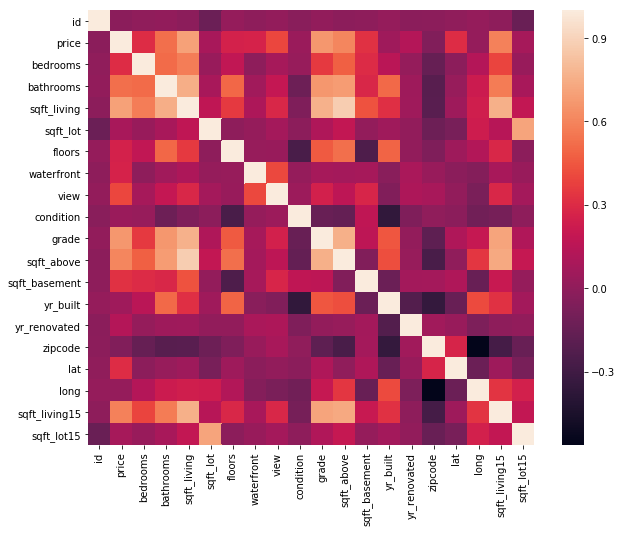

In [21]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr)

In [22]:
#normalisation
x_norm=(df['price']-df['price'].min())/(df['price'].max()-df['price'].min())

In [23]:
x_norm

0        0.019266
1        0.060721
2        0.013770
3        0.069377
4        0.057049
5        0.150820
6        0.023934
7        0.028439
8        0.020262
9        0.032525
10       0.077049
11       0.051541
12       0.030820
13       0.042623
14       0.059672
15       0.075410
16       0.041967
17       0.053770
18       0.014951
19       0.020328
20       0.040656
21       0.252459
22       0.027541
23       0.023305
24       0.033311
25       0.020721
26       0.113049
27       0.077639
28       0.047607
29       0.084459
           ...   
21583    0.042616
21584    0.040000
21585    0.025574
21586    0.056393
21587    0.040656
21588    0.044525
21589    0.035738
21590    0.150492
21591    0.065180
21592    0.052459
21593    0.132852
21594    0.036066
21595    0.058361
21596    0.079338
21597    0.196721
21598    0.061220
21599    0.096393
21600    0.191738
21601    0.051410
21602    0.019541
21603    0.056689
21604    0.046426
21605    0.070254
21606    0.122295
21607    0

In [24]:
x_norm=(df['price']-df['price'].mean())/(df['price'].max()-df['price'].min())

In [25]:
x_norm

0       -0.041730
1       -0.000274
2       -0.047225
3        0.008382
4       -0.003946
5        0.089825
6       -0.037061
7       -0.032556
8       -0.040733
9       -0.028471
10       0.016054
11      -0.009454
12      -0.030175
13      -0.018372
14      -0.001323
15       0.014415
16      -0.019028
17      -0.007225
18      -0.046044
19      -0.040667
20      -0.020339
21       0.191464
22      -0.033454
23      -0.037690
24      -0.027684
25      -0.040274
26       0.052054
27       0.016644
28      -0.013389
29       0.023464
           ...   
21583   -0.018379
21584   -0.020995
21585   -0.035421
21586   -0.004602
21587   -0.020339
21588   -0.016471
21589   -0.025257
21590    0.089497
21591    0.004185
21592   -0.008536
21593    0.071857
21594   -0.024930
21595   -0.002635
21596    0.018343
21597    0.135726
21598    0.000225
21599    0.035398
21600    0.130743
21601   -0.009585
21602   -0.041454
21603   -0.004307
21604   -0.014569
21605    0.009259
21606    0.061300
21607   -0

In [26]:
x_norm.count()

21613

In [27]:
x_norm.describe()

count    2.161300e+04
mean    -1.250641e-17
std      4.814783e-02
min     -6.099517e-02
25%     -2.860828e-02
50%     -1.181484e-02
75%      1.375893e-02
max      9.390048e-01
Name: price, dtype: float64

In [28]:
from sklearn.feature_selection import VarianceThreshold


In [29]:
df_num = df.iloc[:,7:10]
selector =VarianceThreshold(0.5)
selector.fit_transform(df_num)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])